In [3]:
# Importing Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [5]:
# Load dataset
dataset = pd.read_csv('D:/Machine Learning Datasets/Wine.csv')
dataset


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,1


In [7]:
# Dataset attribures
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())
print(dataset.groupby('Customer_Segment').size())

(178, 14)
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.

In [9]:
# Splitting the dataset
array= dataset.values
array

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          3.92000000e+00,   1.06500000e+03,   1.00000000e+00],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          3.40000000e+00,   1.05000000e+03,   1.00000000e+00],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          3.17000000e+00,   1.18500000e+03,   1.00000000e+00],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          1.56000000e+00,   8.35000000e+02,   3.00000000e+00],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          1.62000000e+00,   8.40000000e+02,   3.00000000e+00],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          1.60000000e+00,   5.60000000e+02,   3.00000000e+00]])

In [22]:
x = array[:,0:13]
Y = array[:,13]
seed=11
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, Y, test_size=0.30, random_state=seed)

In [25]:
#Building models
seed = 11
scoring = 'accuracy'
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LDA: 0.983974 (0.032083)
NB: 0.975641 (0.037246)


In [26]:
# Make predictions on test dataset
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_test)
print("Naive Baiyes" , accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Naive Baiyes 0.944444444444
[[21  0  0]
 [ 1 19  2]
 [ 0  0 11]]
             precision    recall  f1-score   support

        1.0       0.95      1.00      0.98        21
        2.0       1.00      0.86      0.93        22
        3.0       0.85      1.00      0.92        11

avg / total       0.95      0.94      0.94        54



In [28]:
#LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions1 = LDA.predict(X_test)
print("LDA", accuracy_score(Y_test, predictions1))
print(confusion_matrix(Y_test, predictions1))
print(classification_report(Y_test, predictions1))

LDA 1.0
[[21  0  0]
 [ 0 22  0]
 [ 0  0 11]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        21
        2.0       1.00      1.00      1.00        22
        3.0       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        54



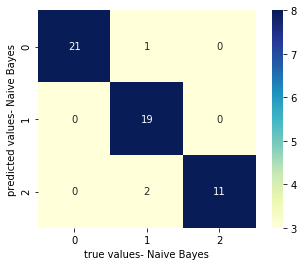

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true values- Naive Bayes')
plt.ylabel('predicted values- Naive Bayes')
plt.show()

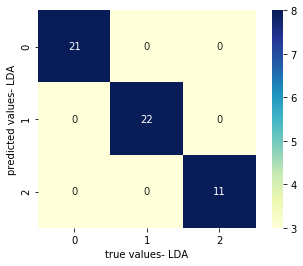

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_test, predictions1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true values- LDA')
plt.ylabel('predicted values- LDA')
plt.show()

In [ ]:
#The model accuracy of LDA is greater as compared to model accuracy of Naive Bayes